In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ks_2samp

In [2]:
return_df = pd.read_excel('C:/Users/caban/Desktop/career/finance/FinLab/kospi_portfolio/kospi_df_1.xlsx', sheet_name=0, header=0)

In [3]:
return_df.head()

,날짜,kospi 수익률,kospi 시가총액
0,2017-10-02,0.9,100
1,2017-10-03,0.9,100
2,2017-10-04,0.9,100
3,2017-10-05,0.9,100
4,2017-10-06,0.9,100


In [4]:
return_df.rename(columns = {'날짜' : 'date', 'kospi 수익률' : 'kospi_return'}, inplace=True)

In [5]:
return_df.drop('kospi 시가총액', axis=1, inplace=True)

In [6]:
return_df.head()

,date,kospi_return
0,2017-10-02,0.9
1,2017-10-03,0.9
2,2017-10-04,0.9
3,2017-10-05,0.9
4,2017-10-06,0.9


In [9]:
return_kospi_df = return_df

NameError: name 'return_df' is not defined

In [8]:
del return_df

In [10]:
return_individual_df = pd.read_excel('C:/Users/caban/Desktop/career/finance/FinLab/kospi_portfolio/kospi_df_1.xlsx', sheetname=1)

In [11]:
return_individual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Columns: 885 entries, date to 엘브이엠씨홀딩스
dtypes: datetime64[ns](1), float64(884)
memory usage: 2.4 MB


In [12]:
return_individual_df.isnull().sum()

date            0
동화약품            0
우리은행            0
KR모터스           0
경방              0
메리츠화재           0
삼양홀딩스           0
삼양홀딩스우          0
하이트진로           0
하이트진로2우B        0
유한양행            0
유한양행우           0
CJ대한통운          0
하이트진로홀딩스        0
하이트진로홀딩스우       0
두산              0
두산우             0
두산2우B           0
성창기업지주          0
대림산업            0
대림산업우           0
유유제약            0
유유제약1우          0
유유제약2우B         0
일동홀딩스           0
한국타이어월드와이드      0
기아차             0
대유플러스           0
노루홀딩스           0
노루홀딩스우          0
             ... 
일동제약            0
넷마블             0
크라운제과           0
크라운제과우          0
현대중공업지주         0
현대일렉트릭          0
현대건설기계          0
경동도시가스          0
미원에스씨           0
오리온             0
제일약품            0
진에어            70
삼양패키징          59
롯데제과           29
케이씨텍           65
BGF리테일         70
동아타이어          59
쿠쿠홈시스         102
SK케미칼          98
SK케미칼우         98
롯데정보통신        301
하나제약          362
HDC현대산업개발     255
효성화학          287
효성티앤씨     

In [13]:
return_individual_df.fillna(0, inplace=True)

In [14]:
return_individual_df.isnull().sum()

date          0
동화약품          0
우리은행          0
KR모터스         0
경방            0
메리츠화재         0
삼양홀딩스         0
삼양홀딩스우        0
하이트진로         0
하이트진로2우B      0
유한양행          0
유한양행우         0
CJ대한통운        0
하이트진로홀딩스      0
하이트진로홀딩스우     0
두산            0
두산우           0
두산2우B         0
성창기업지주        0
대림산업          0
대림산업우         0
유유제약          0
유유제약1우        0
유유제약2우B       0
일동홀딩스         0
한국타이어월드와이드    0
기아차           0
대유플러스         0
노루홀딩스         0
노루홀딩스우        0
             ..
일동제약          0
넷마블           0
크라운제과         0
크라운제과우        0
현대중공업지주       0
현대일렉트릭        0
현대건설기계        0
경동도시가스        0
미원에스씨         0
오리온           0
제일약품          0
진에어           0
삼양패키징         0
롯데제과          0
케이씨텍          0
BGF리테일        0
동아타이어         0
쿠쿠홈시스         0
SK케미칼         0
SK케미칼우        0
롯데정보통신        0
하나제약          0
HDC현대산업개발     0
효성화학          0
효성티앤씨         0
효성중공업         0
효성첨단소재        0
한일시멘트         0
세아제강          0
엘브이엠씨홀딩스      0
dtype: int64

In [15]:
sichong_individual_df = pd.read_excel('C:/Users/caban/Desktop/career/finance/FinLab/kospi_portfolio/kospi_df_1.xlsx', sheetname=2)

In [16]:
sichong_individual_df.head()

,date,동화약품,우리은행,KR모터스,경방,메리츠화재,삼양홀딩스,삼양홀딩스우,하이트진로,하이트진로2우B,...,롯데정보통신,하나제약,HDC현대산업개발,효성화학,효성티앤씨,효성중공업,효성첨단소재,한일시멘트,세아제강,엘브이엠씨홀딩스
0,2017-10-02,239093,12066600,97077,386555,2719832,757938,16814,1844514,21755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240305
1,2017-10-03,239093,12066600,97077,386555,2719832,757938,16814,1844514,21755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240305
2,2017-10-04,239093,12066600,97077,386555,2719832,757938,16814,1844514,21755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240305
3,2017-10-05,239093,12066600,97077,386555,2719832,757938,16814,1844514,21755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240305
4,2017-10-06,239093,12066600,97077,386555,2719832,757938,16814,1844514,21755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240305


In [17]:
sichong_individual_df.isnull().sum()

date            0
동화약품            0
우리은행            0
KR모터스           0
경방              0
메리츠화재           0
삼양홀딩스           0
삼양홀딩스우          0
하이트진로           0
하이트진로2우B        0
유한양행            0
유한양행우           0
CJ대한통운          0
하이트진로홀딩스        0
하이트진로홀딩스우       0
두산              0
두산우             0
두산2우B           0
성창기업지주          0
대림산업            0
대림산업우           0
유유제약            0
유유제약1우          0
유유제약2우B         0
일동홀딩스           0
한국타이어월드와이드      0
기아차             0
대유플러스           0
노루홀딩스           0
노루홀딩스우          0
             ... 
일동제약            0
넷마블             0
크라운제과           0
크라운제과우          0
현대중공업지주         0
현대일렉트릭          0
현대건설기계          0
경동도시가스          0
미원에스씨           0
오리온             0
제일약품            0
진에어            67
삼양패키징          58
롯데제과           28
케이씨텍           64
BGF리테일         67
동아타이어          58
쿠쿠홈시스         101
SK케미칼          95
SK케미칼우         95
롯데정보통신        298
하나제약          362
HDC현대산업개발     253
효성화학          284
효성티앤씨     

In [18]:
sichong_individual_df.set_index('date', inplace=True)

In [19]:
return_kospi_df.set_index('date', inplace=True)

In [20]:
return_individual_df.set_index('date', inplace=True)

In [21]:
sichong_individual_df.fillna(0, inplace=True)

In [22]:
sichong_individual_df.head()

,동화약품,우리은행,KR모터스,경방,메리츠화재,삼양홀딩스,삼양홀딩스우,하이트진로,하이트진로2우B,유한양행,...,롯데정보통신,하나제약,HDC현대산업개발,효성화학,효성티앤씨,효성중공업,효성첨단소재,한일시멘트,세아제강,엘브이엠씨홀딩스
date,,,,,,,,,,,,,,,,,,,,,
2017-10-02,239093,12066600,97077,386555,2719832,757938,16814,1844514,21755,2409008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240305
2017-10-03,239093,12066600,97077,386555,2719832,757938,16814,1844514,21755,2409008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240305
2017-10-04,239093,12066600,97077,386555,2719832,757938,16814,1844514,21755,2409008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240305
2017-10-05,239093,12066600,97077,386555,2719832,757938,16814,1844514,21755,2409008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240305
2017-10-06,239093,12066600,97077,386555,2719832,757938,16814,1844514,21755,2409008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240305


In [23]:
sichong_total_series = sichong_individual_df.apply((lambda x: sum(x)), axis=1)

In [24]:
type(sichong_total_series)

pandas.core.series.Series

In [25]:
sichong_total_series.tail()

date
2018-09-24    1.560659e+09
2018-09-25    1.560659e+09
2018-09-26    1.560659e+09
2018-09-27    1.571317e+09
2018-09-28    1.562833e+09
dtype: float64

In [26]:
len(sichong_total_series)

362

In [27]:
len(sichong_individual_df.columns)

884

In [28]:
len(sichong_individual_df)

362

In [29]:
for col in sichong_individual_df.columns:
        weight = {col: []}

In [30]:
weight

{'엘브이엠씨홀딩스': []}

In [31]:
sichong_individual_df['동화약품'][0]

239093

In [32]:
for col in sichong_individual_df.columns:
    weight = {col: []}    
    for i in range(0, len(sichong_individual_df)):
            weight[col].append((sichong_individual_df[col][i] / sichong_total_series[i]))

In [33]:
weight

{'엘브이엠씨홀딩스': [0.00015299484777108783,
  0.00015299484777108783,
  0.00015299484777108783,
  0.00015299484777108783,
  0.00015299484777108783,
  0.00015299484777108783,
  0.00015299484777108783,
  0.00015299484777108783,
  0.00014617397246944228,
  0.00014831593400312985,
  0.00014818121953645853,
  0.00014367095562013203,
  0.00014367095562013203,
  0.00014367095562013203,
  0.00013770223294246847,
  0.00013771470448741878,
  0.00013367998016370266,
  0.00014140136197203043,
  0.0001412909881208873,
  0.0001412909881208873,
  0.0001412909881208873,
  0.00014007441401395058,
  0.00014309566779554083,
  0.00014254678495496904,
  0.0001442522123875013,
  0.00014674136624372262,
  0.00014674136624372262,
  0.00014674136624372262,
  0.00014575238877708214,
  0.00014402575912721773,
  0.00014096187364308975,
  0.00013764430381712678,
  0.00013836786761967223,
  0.00013836786761967223,
  0.00013836786761967223,
  0.0001365709982453366,
  0.00013760623314805888,
  0.00013688423109656797,
  0.0

In [34]:
def calculate_weight(col_name):
    weight_list = []
    for i in range(0, len(sichong_total_series)):
        weight_list.append(sichong_individual_df[col_name][i] / sichong_total_series[i])
    weight_df = pd.DataFrame(data=weight_list, columns=[col_name])
    
    return weight_df

In [35]:
weight_df = calculate_weight('동화약품')

In [36]:
weight_df.rename(columns={'동화약품':0}, inplace=True)

In [37]:
for col in sichong_individual_df.columns:
    weight_df_1 = calculate_weight(col)
    weight_df = pd.concat([weight_df, weight_df_1], axis=1)

In [38]:
weight_df.drop(0, axis=1, inplace=True)

In [39]:
weight_df.head()

,동화약품,우리은행,KR모터스,경방,메리츠화재,삼양홀딩스,삼양홀딩스우,하이트진로,하이트진로2우B,유한양행,...,롯데정보통신,하나제약,HDC현대산업개발,효성화학,효성티앤씨,효성중공업,효성첨단소재,한일시멘트,세아제강,엘브이엠씨홀딩스
0,0.000152,0.007682,0.000062,0.000246,0.001732,0.000483,0.000011,0.001174,0.000014,0.001534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153
1,0.000152,0.007682,0.000062,0.000246,0.001732,0.000483,0.000011,0.001174,0.000014,0.001534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153
2,0.000152,0.007682,0.000062,0.000246,0.001732,0.000483,0.000011,0.001174,0.000014,0.001534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153
3,0.000152,0.007682,0.000062,0.000246,0.001732,0.000483,0.000011,0.001174,0.000014,0.001534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153
4,0.000152,0.007682,0.000062,0.000246,0.001732,0.000483,0.000011,0.001174,0.000014,0.001534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153


In [40]:
return_individual_df.head()

,동화약품,우리은행,KR모터스,경방,메리츠화재,삼양홀딩스,삼양홀딩스우,하이트진로,하이트진로2우B,유한양행,...,롯데정보통신,하나제약,HDC현대산업개발,효성화학,효성티앤씨,효성중공업,효성첨단소재,한일시멘트,세아제강,엘브이엠씨홀딩스
date,,,,,,,,,,,,,,,,,,,,,
2017-10-02,0.12,0.85,1.97,-1.05,2.28,0.11,-0.18,0.77,1.32,1.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-03,0.12,0.85,1.97,-1.05,2.28,0.11,-0.18,0.77,1.32,1.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-04,0.12,0.85,1.97,-1.05,2.28,0.11,-0.18,0.77,1.32,1.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-05,0.12,0.85,1.97,-1.05,2.28,0.11,-0.18,0.77,1.32,1.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-06,0.12,0.85,1.97,-1.05,2.28,0.11,-0.18,0.77,1.32,1.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
def calculate_fake_kospi():
    result = []
    for i in range(0, len(weight_df)):
        fake_kospi_list = []
        for col in weight_df.columns:
            fake_kospi_list.append(weight_df[col][i] * return_individual_df[col][i])
        result.append(sum(fake_kospi_list))
    result = pd.Series(result)
    
    return result

In [42]:
fake_kospi_df = calculate_fake_kospi()

In [43]:
fake_kospi_df

0      0.881840
1      0.881840
2      0.881840
3      0.881840
4      0.881840
5      0.881840
6      0.881840
7      0.881840
8      1.699946
9      1.144418
10     0.731262
11     0.120858
12     0.120858
13     0.120858
14     0.315893
15     0.349140
16    -0.007267
17    -0.517091
18     0.726670
19     0.726670
20     0.726670
21     0.061776
22     0.179241
23     0.001182
24    -0.475823
25     0.736826
26     0.736826
27     0.736826
28     0.215659
29     1.033784
         ...   
332   -0.025266
333    0.708021
334    0.708021
335    0.708021
336   -0.690729
337    0.398828
338   -1.027860
339   -0.198156
340   -0.273871
341   -0.273871
342   -0.273871
343    0.364198
344   -0.240408
345   -0.018167
346    0.136931
347    1.509164
348    1.509164
349    1.509164
350   -0.657411
351    0.305936
352    0.053023
353    0.721825
354    0.718559
355    0.718559
356    0.718559
357    0.718559
358    0.718559
359    0.718559
360    0.732077
361   -0.476066
dtype: float64

In [44]:
fake_kospi_df = pd.DataFrame(data=fake_kospi_df, columns=['fake_kospi'])

In [45]:
fake_kospi_df = fake_kospi_df.apply(lambda x: round(x,2))

In [46]:
fake_kospi_df

,fake_kospi
0,0.88
1,0.88
2,0.88
3,0.88
4,0.88
5,0.88
6,0.88
7,0.88
8,1.70
9,1.14


In [47]:
return_kospi_df

,kospi_return
date,
2017-10-02,0.90
2017-10-03,0.90
2017-10-04,0.90
2017-10-05,0.90
2017-10-06,0.90
2017-10-07,0.90
2017-10-08,0.90
2017-10-09,0.90
2017-10-10,1.64


C:\Users\caban\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


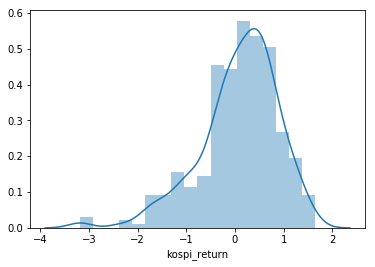

In [48]:
sns.distplot(return_kospi_df['kospi_return'])

C:\Users\caban\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


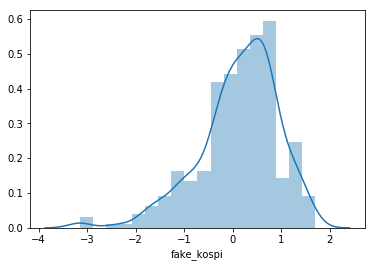

In [49]:
sns.distplot(fake_kospi_df['fake_kospi'])

# Kolmogorov-Smirnov 검증(2개 표본) 
### D-통계량을 이용. 2개 표본의 cdf를 비교. D-통계량 값이 낮을수록 p-값은 커진다
### H_0 : 2개 표본은 서로 같은 분포를 따름 vs H_a : 서로 다른 분포를 따름
### 검증 결과 p-값이 설정하였던 유의수준 0.05 보다 작게 나와 귀무가설을 기각. 2개 표본은 다른 분포를 따른다는 결론. 하지만 매우 낮은 수치는 아니므로 분포가 비슷하다고 할 수 있다.

In [101]:
ks_2samp(fake_kospi_df['fake_kospi'], return_kospi_df['kospi_return'])

Ks_2sampResult(statistic=0.074585635359116, pvalue=0.25631693704763575)

In [53]:
dividend_df = pd.read_excel('C:/Users/caban/Desktop/career/finance/FinLab/kospi_portfolio/dividend_df_1.xlsx')

In [54]:
dividend_df.head()

,date,동화약품,우리은행,KR모터스,경방,메리츠화재,삼양홀딩스,삼양홀딩스우,하이트진로,하이트진로2우B,...,롯데정보통신,하나제약,HDC현대산업개발,효성화학,효성티앤씨,효성중공업,효성첨단소재,한일시멘트,세아제강,엘브이엠씨홀딩스
0,2017-10-02,1.54,3.17,NaN,1.29,4.85,1.64,NaN,3.32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-03,1.54,3.17,NaN,1.29,4.85,1.64,NaN,3.32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-10-04,1.54,3.17,NaN,1.29,4.85,1.64,NaN,3.32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-10-05,1.54,3.17,NaN,1.29,4.85,1.64,NaN,3.32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-10-06,1.54,3.17,NaN,1.29,4.85,1.64,NaN,3.32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
dividend_df.set_index('date', inplace=True)

In [57]:
dividend_df.tail()

,동화약품,우리은행,KR모터스,경방,메리츠화재,삼양홀딩스,삼양홀딩스우,하이트진로,하이트진로2우B,유한양행,...,롯데정보통신,하나제약,HDC현대산업개발,효성화학,효성티앤씨,효성중공업,효성첨단소재,한일시멘트,세아제강,엘브이엠씨홀딩스
date,,,,,,,,,,,,,,,,,,,,,
2018-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
dividend_df.isnull().sum()

동화약품          271
우리은행          271
KR모터스         362
경방            271
메리츠화재         271
삼양홀딩스         271
삼양홀딩스우        362
하이트진로         271
하이트진로2우B      362
유한양행          271
유한양행우         362
CJ대한통운        362
하이트진로홀딩스      271
하이트진로홀딩스우     362
두산             90
두산우           362
두산2우B         362
성창기업지주        362
대림산업          271
대림산업우         362
유유제약          271
유유제약1우        362
유유제약2우B       362
일동홀딩스         271
한국타이어월드와이드    271
기아차           271
대유플러스         362
노루홀딩스         271
노루홀딩스우        362
한화손해보험        271
             ... 
일동제약          271
넷마블           271
크라운제과         271
크라운제과우        362
현대중공업지주       362
현대일렉트릭        362
현대건설기계        362
경동도시가스        271
미원에스씨         271
오리온           271
제일약품          271
진에어           271
삼양패키징         362
롯데제과          271
케이씨텍          271
BGF리테일        271
동아타이어         362
쿠쿠홈시스         362
SK케미칼         362
SK케미칼우        362
롯데정보통신        362
하나제약          362
HDC현대산업개발     362
효성화학          362
효성티앤씨     

In [59]:
dividend_df.fillna(0, inplace=True)

In [60]:
dividend_df.isnull().sum()

동화약품          0
우리은행          0
KR모터스         0
경방            0
메리츠화재         0
삼양홀딩스         0
삼양홀딩스우        0
하이트진로         0
하이트진로2우B      0
유한양행          0
유한양행우         0
CJ대한통운        0
하이트진로홀딩스      0
하이트진로홀딩스우     0
두산            0
두산우           0
두산2우B         0
성창기업지주        0
대림산업          0
대림산업우         0
유유제약          0
유유제약1우        0
유유제약2우B       0
일동홀딩스         0
한국타이어월드와이드    0
기아차           0
대유플러스         0
노루홀딩스         0
노루홀딩스우        0
한화손해보험        0
             ..
일동제약          0
넷마블           0
크라운제과         0
크라운제과우        0
현대중공업지주       0
현대일렉트릭        0
현대건설기계        0
경동도시가스        0
미원에스씨         0
오리온           0
제일약품          0
진에어           0
삼양패키징         0
롯데제과          0
케이씨텍          0
BGF리테일        0
동아타이어         0
쿠쿠홈시스         0
SK케미칼         0
SK케미칼우        0
롯데정보통신        0
하나제약          0
HDC현대산업개발     0
효성화학          0
효성티앤씨         0
효성중공업         0
효성첨단소재        0
한일시멘트         0
세아제강          0
엘브이엠씨홀딩스      0
dtype: int64

In [62]:
len(dividend_df.columns) == len(weight_df.columns)

True

In [66]:
def calculate_fake_dividend():
    result = []
    for i in range(0, len(weight_df)):
        fake_dividend_list = []
        for col in weight_df.columns:
            fake_dividend_list.append(weight_df[col][i] * dividend_df[col][i])
        result.append(sum(fake_dividend_list))
    result = pd.Series(result)
    
    return result

In [67]:
fake_dividend_df = pd.DataFrame(data=calculate_fake_dividend(), columns=['fake_dividend'])

In [68]:
fake_dividend_df.head()

,fake_dividend
0,1.376668
1,1.376668
2,1.376668
3,1.376668
4,1.376668


In [69]:
fake_dividend_df = fake_dividend_df.apply(lambda x: round(x, 2))

In [70]:
fake_dividend_df.head()

,fake_dividend
0,1.38
1,1.38
2,1.38
3,1.38
4,1.38


C:\Users\caban\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


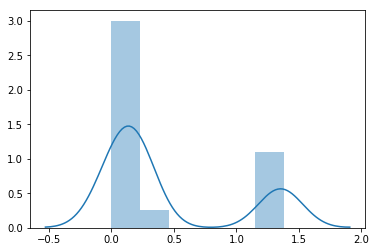

In [71]:
sns.distplot(fake_dividend_df)

C:\Users\caban\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


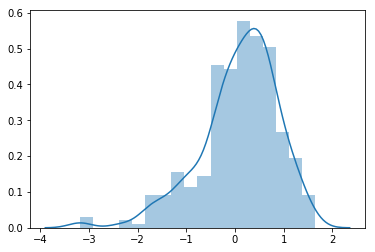

In [72]:
sns.distplot(return_kospi_df)

In [79]:
len(fake_kospi_df) == len(fake_dividend_df)

True

In [85]:
type(fake_kospi_df['fake_kospi'][0]) == type(fake_dividend_df['fake_dividend'][0])

True

In [89]:
total_list = []
for i in range(0, len(fake_dividend_df)):
    total_list.append(fake_kospi_df['fake_kospi'][i] + fake_dividend_df['fake_dividend'][i])

In [90]:
total_list[0]

2.26

C:\Users\caban\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


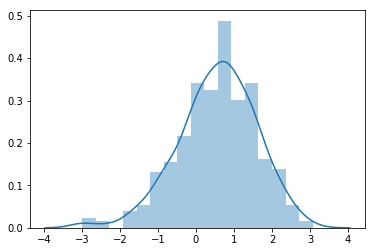

In [91]:
sns.distplot(total_list)

In [92]:
fake_total_df = pd.DataFrame(data=total_list, columns=['fake_total'])

In [93]:
fake_total_df.head(3)

,fake_total
0,2.26
1,2.26
2,2.26


C:\Users\caban\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


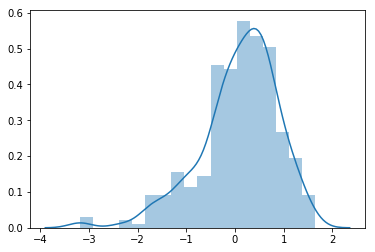

In [94]:
sns.distplot(return_kospi_df)

# Kolmogorov-Smirnov 검증(2개 표본)
### p-값이 매우 낮으므로 유의하다고 판단하여 귀무가설을 기각. 즉 서로 다른 분포를 따른다

In [99]:
ks_2samp(return_kospi_df['kospi_return'], fake_total_df['fake_total'])

Ks_2sampResult(statistic=0.3121546961325966, pvalue=4.882740843499405e-16)